In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("full_data_7_23.csv")

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2954/2112191877.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("full_data_7_23.csv")


In [3]:
df.head()

,Unnamed: 0,course_id,institution_id,was_retained,week_end,week_start,subject_group_constant,course_term_constant,course_year_constant,inclusive_access__c_constant,...,weeks_into_course,writing_sum_normalized,writing_tools_multi_draft_assignment_assigned_sum_cum,writing_tools_provide_feedback__draft_goal_comment_sum_cum,writing_tools_provide_feedback__editing_mark_comment_sum_cum,writing_tools_review_reports_within_writing_sum_cum,writing_tools_single_draft_assignment_assigned_sum_cum,writing_tools_use_draft_comparison_tool_sum_cum,writing_tools_use_peer_review_draft_sum_cum,foundry_extract_ts
0,0,02c837e2-1b85-4d58-b237-f5e7ed77018a,001i000000iQpdXAAS,NaN,11/13/22,11/7/22,Principles of Economics,fall,2022,True,...,11,NaN,0,0,0,0,0,0,0,7/3/23 18:37
1,1,02947c7c-1fd0-4111-b1e0-cfcc2591e756,001i000000iQuLHAA0,1.0,10/24/21,10/18/21,Calculus,fall,2021,False,...,8,NaN,0,0,0,0,0,0,0,7/3/23 18:37
2,2,02947c7c-1fd0-4111-b1e0-cfcc2591e756,001i000000iQuLHAA0,1.0,12/12/21,12/6/21,Calculus,fall,2021,False,...,15,NaN,0,0,0,0,0,0,0,7/3/23 18:37
3,3,02c837e2-1b85-4d58-b237-f5e7ed77018a,001i000000iQpdXAAS,NaN,1/8/23,1/2/23,Principles of Economics,fall,2022,True,...,19,NaN,0,0,0,0,0,0,0,7/3/23 18:37
4,4,02c837e2-1b85-4d58-b237-f5e7ed77018a,001i000000iQpdXAAS,NaN,1/22/23,1/16/23,Principles of Economics,fall,2022,True,...,21,NaN,0,0,0,0,0,0,0,7/3/23 18:37


In [4]:
df.columns

Index(['Unnamed: 0', 'course_id', 'institution_id', 'was_retained', 'week_end',
       'week_start', 'subject_group_constant', 'course_term_constant',
       'course_year_constant', 'inclusive_access__c_constant',
       'twoyearorfouryear__c_constant', 'integration_platform__c_constant',
       'student_cnt_constant', 'days_into_week_couse_start_constant',
       'activity_types_used', 'avg_days_launched', 'avg_days_launched_cum_avg',
       'avg_student_launch_cnt', 'avg_student_launch_cnt_cum_avg',
       'change_from_avg_student_launch_this_week', 'chapters_used_cnt',
       'custom_nga_homework_sum_normalized', 'custom_nga_quiz_sum_normalized',
       'diagnostics_sum_normalized', 'enrollment_cs',
       'extracredit_sum_normalized',
       'foundational_experience_completing_batch_assign_actions_sum_cum',
       'foundational_experience_custom_activity_created__assessment_sum_cum',
       'foundational_experience_custom_activity_created__instructorfile_sum_cum',
       'foundatio

In [5]:
df.shape

(295781, 100)

In [6]:
#Understanding types of values in 'was_retained' column
df["was_retained"].value_counts().rename_axis('Values').reset_index(name='counts')

,Values,counts
0,1.0,109900
1,0.0,14869


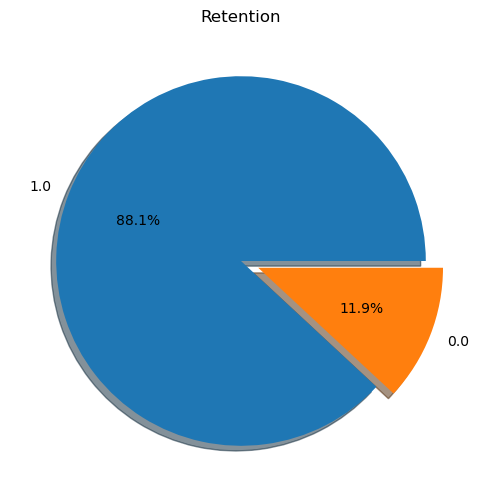

In [7]:
#Visualizing value counts split
plt.figure(figsize=(10, 6))
ax = df['was_retained'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
ax.set_title('Retention')
plt.ylabel('')

# Show the plot
plt.show()

In [8]:
#Number of null values in the column
print('Number of null values: ',df["was_retained"].isna().sum())

Number of null values:  171012


In [9]:
value_counts = df['was_retained'].value_counts(dropna=False)
print(value_counts)

was_retained
NaN    171012
1.0    109900
0.0     14869
Name: count, dtype: int64


In [10]:
#Understanding number of duplicates in the dataframe
num_duplicates = df.duplicated().sum()

print("Number of Duplicate Rows:", num_duplicates)

Number of Duplicate Rows: 0


In [11]:
df = df.drop('Unnamed: 0', axis=1)

In [12]:
df.head()

,course_id,institution_id,was_retained,week_end,week_start,subject_group_constant,course_term_constant,course_year_constant,inclusive_access__c_constant,twoyearorfouryear__c_constant,...,weeks_into_course,writing_sum_normalized,writing_tools_multi_draft_assignment_assigned_sum_cum,writing_tools_provide_feedback__draft_goal_comment_sum_cum,writing_tools_provide_feedback__editing_mark_comment_sum_cum,writing_tools_review_reports_within_writing_sum_cum,writing_tools_single_draft_assignment_assigned_sum_cum,writing_tools_use_draft_comparison_tool_sum_cum,writing_tools_use_peer_review_draft_sum_cum,foundry_extract_ts
0,02c837e2-1b85-4d58-b237-f5e7ed77018a,001i000000iQpdXAAS,NaN,11/13/22,11/7/22,Principles of Economics,fall,2022,True,4 Year,...,11,NaN,0,0,0,0,0,0,0,7/3/23 18:37
1,02947c7c-1fd0-4111-b1e0-cfcc2591e756,001i000000iQuLHAA0,1.0,10/24/21,10/18/21,Calculus,fall,2021,False,4 Year,...,8,NaN,0,0,0,0,0,0,0,7/3/23 18:37
2,02947c7c-1fd0-4111-b1e0-cfcc2591e756,001i000000iQuLHAA0,1.0,12/12/21,12/6/21,Calculus,fall,2021,False,4 Year,...,15,NaN,0,0,0,0,0,0,0,7/3/23 18:37
3,02c837e2-1b85-4d58-b237-f5e7ed77018a,001i000000iQpdXAAS,NaN,1/8/23,1/2/23,Principles of Economics,fall,2022,True,4 Year,...,19,NaN,0,0,0,0,0,0,0,7/3/23 18:37
4,02c837e2-1b85-4d58-b237-f5e7ed77018a,001i000000iQpdXAAS,NaN,1/22/23,1/16/23,Principles of Economics,fall,2022,True,4 Year,...,21,NaN,0,0,0,0,0,0,0,7/3/23 18:37


In [16]:
filtered_df = df[df['course_id'] == '26601b3f-6ef8-4e93-be5b-7a9e7752f2da']
filtered_df.head(13)

,course_id,institution_id,was_retained,week_end,week_start,subject_group_constant,course_term_constant,course_year_constant,inclusive_access__c_constant,twoyearorfouryear__c_constant,...,weeks_into_course,writing_sum_normalized,writing_tools_multi_draft_assignment_assigned_sum_cum,writing_tools_provide_feedback__draft_goal_comment_sum_cum,writing_tools_provide_feedback__editing_mark_comment_sum_cum,writing_tools_review_reports_within_writing_sum_cum,writing_tools_single_draft_assignment_assigned_sum_cum,writing_tools_use_draft_comparison_tool_sum_cum,writing_tools_use_peer_review_draft_sum_cum,foundry_extract_ts
6,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,10/9/22,10/3/22,General Chemistry,fall,2022,False,4 Year,...,2,NaN,0,0,0,0,0,0,0,7/3/23 18:37
83729,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,10/23/22,10/17/22,General Chemistry,fall,2022,False,4 Year,...,4,NaN,0,0,0,0,0,0,0,7/3/23 18:37
88070,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,11/27/22,11/21/22,General Chemistry,fall,2022,False,4 Year,...,9,NaN,0,0,0,0,0,0,0,7/3/23 18:37
90195,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,11/6/22,10/31/22,General Chemistry,fall,2022,False,4 Year,...,6,NaN,0,0,0,0,0,0,0,7/3/23 18:37
93579,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,12/4/22,11/28/22,General Chemistry,fall,2022,False,4 Year,...,10,NaN,0,0,0,0,0,0,0,7/3/23 18:37
116160,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,10/30/22,10/24/22,General Chemistry,fall,2022,False,4 Year,...,5,NaN,0,0,0,0,0,0,0,7/3/23 18:37
134327,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,10/2/22,9/26/22,General Chemistry,fall,2022,False,4 Year,...,1,NaN,0,0,0,0,0,0,0,7/3/23 18:37
148651,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,9/25/22,9/19/22,General Chemistry,fall,2022,False,4 Year,...,0,NaN,0,0,0,0,0,0,0,7/3/23 18:37
180782,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,11/13/22,11/7/22,General Chemistry,fall,2022,False,4 Year,...,7,NaN,0,0,0,0,0,0,0,7/3/23 18:37
180783,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,12/11/22,12/5/22,General Chemistry,fall,2022,False,4 Year,...,11,NaN,0,0,0,0,0,0,0,7/3/23 18:37


In [14]:
filtered_df.shape

(13, 99)

In [116]:
df['subject_group_constant'].nunique()

47

## Top 12 course areas

### 1. Chemistry
### 2. History 
### 3. Maths
### 4. Composition
### 5. Psychology
### 6. Biology
### 7. Communication 
### 8. Nutrition
### 9. Economics
### 10. Statistics
### 11. Biochemistry
### 12. Physics

In [117]:
df['subject_group_constant'].value_counts()

subject_group_constant
General Chemistry           39892
Principles of Economics     34064
Handbooks                   22732
Introductory Psychology     17950
Other Chemistry             17657
Statistics                  15762
Organic Chemistry           13623
Biochemistry                12426
Nonmajors Biology           10024
Intro Chemistry              9845
Developmental Other          8798
Calculus                     7722
Majors Biology               7553
GOB                          7477
Developmental Psychology     6615
Genetics                     6016
Rhetorics                    5682
Readers                      5320
Algebra Based Physics        5294
Sinauer Biology              3720
Calculus Based Physics       3546
Other Physics                2989
Abnormal & Clinical          2960
Environmental Science        2683
Geography                    2496
Intermediate Macro           2230
West and World History       2208
Intermediate Micro           2130
US History               

In [118]:
def examine_data_quality(df):
    # Examine data quality
    print('{:<80}  {:<10}  {:<10}  {:<10}'.format('Column', 'N unique', 'Amt null', 'dtype'))
    print('-'*110)
    for column in df.columns:
        print('{:<80}  {:<10}  {:<10}  {:<10}'.format(column, df[column].nunique(), sum(df[column].isna()), str(df[column].dtype)))

In [119]:
examine_data_quality(df)

Column                                                                            N unique    Amt null    dtype     
--------------------------------------------------------------------------------------------------------------
course_id                                                                         16731       0           object    
institution_id                                                                    1562        0           object    
was_retained                                                                      2           171012      float64   
week_end                                                                          128         0           object    
week_start                                                                        128         0           object    
subject_group_constant                                                            47          0           object    
course_term_constant                                                  

used_custom_nga_quiz                                                              2           0           int64     
used_diagnostics                                                                  2           0           int64     
used_extracredit                                                                  2           0           int64     
used_goal_and_reflection_survey                                                   2           0           int64     
used_graded                                                                       2           0           int64     
used_in_class_activity_guide                                                      2           0           int64     
used_learing_curve                                                                2           0           int64     
used_mapi                                                                         2           0           int64     
used_reading                                                    

In [120]:
X_columns = ['used_reading',
    'used_custom_nga_homework',
    'used_custom_nga_quiz',
    'used_extracredit',
    'used_graded',
    'used_template_nga_homework',
    'used_template_nga_quiz',
    'used_goal_and_reflection_survey',
    'used_learing_curve',
    'used_mapi',
    'used_diagnostics']

Y_column = 'was_retained'


spearman_corr_matrix = df[X_columns + [Y_column]].corr(method='spearman').loc[Y_column, X_columns]

In [121]:
spearman_corr_matrix

used_reading                      -0.021344
used_custom_nga_homework           0.030625
used_custom_nga_quiz               0.005369
used_extracredit                  -0.004077
used_graded                        0.007074
used_template_nga_homework        -0.024821
used_template_nga_quiz            -0.012629
used_goal_and_reflection_survey   -0.028456
used_learing_curve                -0.013421
used_mapi                         -0.020244
used_diagnostics                  -0.031021
Name: was_retained, dtype: float64

## Chemistry

In [122]:
chemistry_df = df[df['subject_group_constant'].str.contains('Chemistry')]

In [123]:
chemistry_df.head()

,course_id,institution_id,was_retained,week_end,week_start,subject_group_constant,course_term_constant,course_year_constant,inclusive_access__c_constant,twoyearorfouryear__c_constant,...,weeks_into_course,writing_sum_normalized,writing_tools_multi_draft_assignment_assigned_sum_cum,writing_tools_provide_feedback__draft_goal_comment_sum_cum,writing_tools_provide_feedback__editing_mark_comment_sum_cum,writing_tools_review_reports_within_writing_sum_cum,writing_tools_single_draft_assignment_assigned_sum_cum,writing_tools_use_draft_comparison_tool_sum_cum,writing_tools_use_peer_review_draft_sum_cum,foundry_extract_ts
6,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,10/9/22,10/3/22,General Chemistry,fall,2022,False,4 Year,...,2,NaN,0,0,0,0,0,0,0,7/3/23 18:37
11,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/14/21,11/8/21,Intro Chemistry,fall,2021,True,2 Year,...,12,NaN,0,0,0,0,0,0,0,7/3/23 18:37
12,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/28/21,11/22/21,Intro Chemistry,fall,2021,True,2 Year,...,14,NaN,0,0,0,0,0,0,0,7/3/23 18:37
20,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/11/22,12/5/22,General Chemistry,fall,2022,True,2 Year,...,17,NaN,0,0,0,0,0,0,0,7/3/23 18:37
21,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/18/22,12/12/22,General Chemistry,fall,2022,True,2 Year,...,18,NaN,0,0,0,0,0,0,0,7/3/23 18:37


In [124]:
chemistry_df['subject_group_constant'].value_counts()

subject_group_constant
General Chemistry      39892
Other Chemistry        17657
Organic Chemistry      13623
Intro Chemistry         9845
Chemistry & Society      899
Name: count, dtype: int64

In [125]:
chemistry_df = chemistry_df[chemistry_df['subject_group_constant'] != 'Chemistry & Society']

In [126]:
chemistry_df['subject_group_constant'].value_counts()

subject_group_constant
General Chemistry    39892
Other Chemistry      17657
Organic Chemistry    13623
Intro Chemistry       9845
Name: count, dtype: int64

In [127]:
chemistry_df.shape

(81017, 99)

In [128]:
examine_data_quality(chemistry_df)

Column                                                                            N unique    Amt null    dtype     
--------------------------------------------------------------------------------------------------------------
course_id                                                                         4616        0           object    
institution_id                                                                    706         0           object    
was_retained                                                                      2           42275       float64   
week_end                                                                          102         0           object    
week_start                                                                        102         0           object    
subject_group_constant                                                            4           0           object    
course_term_constant                                                  

In [129]:
columns_with_missing_values = chemistry_df.columns[chemistry_df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: ['was_retained', 'inclusive_access__c_constant', 'twoyearorfouryear__c_constant', 'integration_platform__c_constant', 'custom_nga_homework_sum_normalized', 'custom_nga_quiz_sum_normalized', 'diagnostics_sum_normalized', 'extracredit_sum_normalized', 'goal_and_reflection_survey_sum_normalized', 'graded_sum_normalized', 'in_class_activity_guide_sum_normalized', 'learing_curve_sum_normalized', 'mapi_sum_normalized', 'reading_sum_normalized', 'staticfile_sum_normalized', 'template_nga_homework_sum_normalized', 'template_nga_quiz_sum_normalized', 'total_assignments_sum_normalized', 'ungraded_sum_normalized', 'writing_sum_normalized']


### question
do we need the normalized columns
what is sum_cum

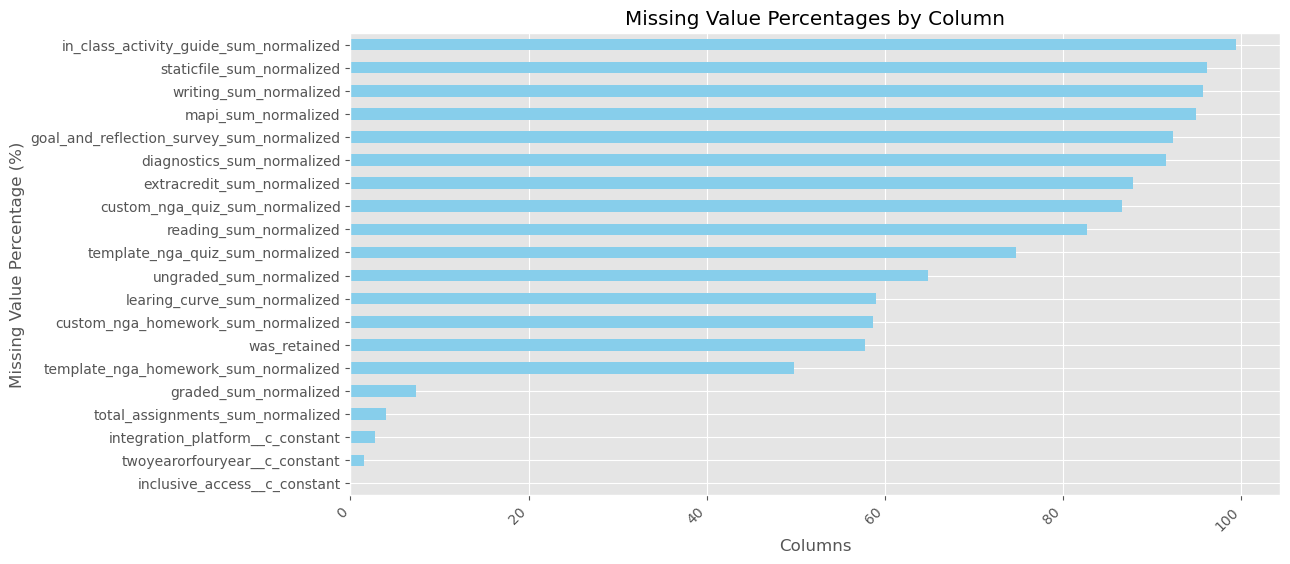

In [130]:
import matplotlib.pyplot as plt

# Calculate missing value percentages for each column
missing_percentages = (df.isnull().mean() * 100).round(2)

missing_percentages = missing_percentages[missing_percentages > 0]

missing_percentages = missing_percentages.sort_values()

# Create a bar chart
plt.figure(figsize=(12, 6))
missing_percentages.plot(kind='barh', color='skyblue')
plt.title('Missing Value Percentages by Column')
plt.xlabel('Columns')
plt.ylabel('Missing Value Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [131]:
chemistry_df.head()

,course_id,institution_id,was_retained,week_end,week_start,subject_group_constant,course_term_constant,course_year_constant,inclusive_access__c_constant,twoyearorfouryear__c_constant,...,weeks_into_course,writing_sum_normalized,writing_tools_multi_draft_assignment_assigned_sum_cum,writing_tools_provide_feedback__draft_goal_comment_sum_cum,writing_tools_provide_feedback__editing_mark_comment_sum_cum,writing_tools_review_reports_within_writing_sum_cum,writing_tools_single_draft_assignment_assigned_sum_cum,writing_tools_use_draft_comparison_tool_sum_cum,writing_tools_use_peer_review_draft_sum_cum,foundry_extract_ts
6,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,10/9/22,10/3/22,General Chemistry,fall,2022,False,4 Year,...,2,NaN,0,0,0,0,0,0,0,7/3/23 18:37
11,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/14/21,11/8/21,Intro Chemistry,fall,2021,True,2 Year,...,12,NaN,0,0,0,0,0,0,0,7/3/23 18:37
12,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/28/21,11/22/21,Intro Chemistry,fall,2021,True,2 Year,...,14,NaN,0,0,0,0,0,0,0,7/3/23 18:37
20,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/11/22,12/5/22,General Chemistry,fall,2022,True,2 Year,...,17,NaN,0,0,0,0,0,0,0,7/3/23 18:37
21,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/18/22,12/12/22,General Chemistry,fall,2022,True,2 Year,...,18,NaN,0,0,0,0,0,0,0,7/3/23 18:37


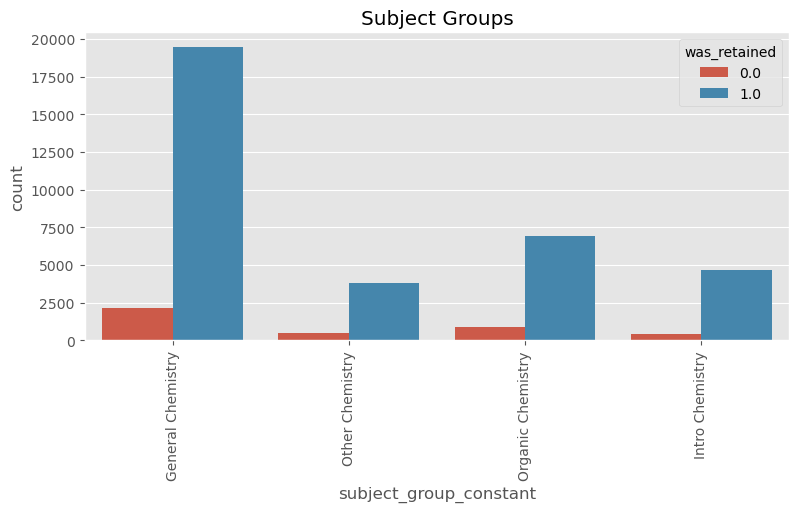

In [132]:
import seaborn as sns

plt.style.use("ggplot")

plt.figure(figsize=(20, 4))
plt.subplot(121)
order = chemistry_df['subject_group_constant'].value_counts().index

sns.countplot(data=chemistry_df, x='subject_group_constant', hue='was_retained', order=order)
plt.xticks(rotation=90)
plt.title('Subject Groups')

# Display the plot
plt.show()

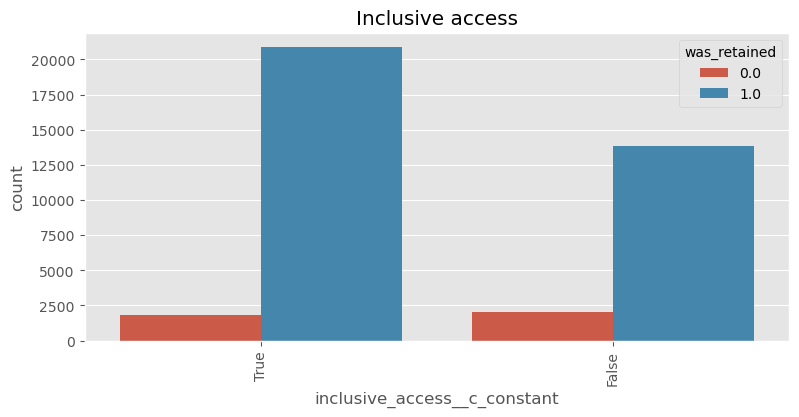

In [133]:
import seaborn as sns

plt.style.use("ggplot")

plt.figure(figsize=(20, 4))
plt.subplot(121)
order = chemistry_df['inclusive_access__c_constant'].value_counts().index

sns.countplot(data=chemistry_df, x='inclusive_access__c_constant', hue='was_retained', order=order)
plt.xticks(rotation=90)
plt.title('Inclusive access')

# Display the plot
plt.show()

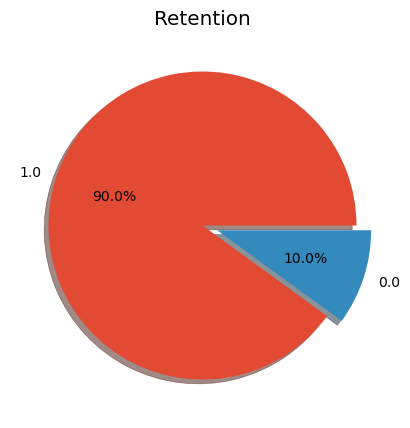

In [134]:
#Visualizing value counts split
plt.figure(figsize=(5, 5))
ax = chemistry_df['was_retained'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True)
ax.set_title('Retention')
plt.ylabel('')

# Show the plot
plt.show()

## Levels for chemistry

### Level 1
**Summary**
Primarily eBook use, especially in specific sub-disciplines like analytical or organic chemistry. Represents users primarily focused on digital content access.
**Implementation**
Assigning Assessment content as Homework, Assigning Assessment content for Quizzing, Creating new questions, Customizing Macmillan Learning questions, Evaluating student work in NGA

### Level 2
**Summary**
Includes eBook access and chapter-level homework, occasionally with LearningCurve. This is the most common usage pattern, indicating a standard level of course integration with Achieve.
**Implementation**
Assigning Reading activities, Assigning Assessment content as Homework, Assigning Assessment content for Quizzing, Creating new questions, Customizing Macmillan Learning questions, Assigning LearningCurve activities, Evaluating student work in NGA, Assigning video assessment (e.g. Alvin)

### Level 3
**Summary**
Comprehensive usage involving multiple tools like eBook, chapter homework, LearningCurve, iClicker, and potentially another asset. Indicates a high level of engagement and integration of Achieve into the course structure.
**Implementation**
Assigning Reading activities, Assigning Assessment content as Homework, Assigning Assessment content for Quizzing, Creating new questions, Customizing Macmillan Learning questions, Assigning LearningCurve activities, Assigning Diagnostic activities, Assigning GRS surveys, Evaluating student work in NGA, Assigning video assessment (e.g. Alvin)


### question
1. does creating new question mean extra credit
2. what is mapi and staticfile
3. which column indicates video assessments

### Assess Level 1 based on following columns
1. used_reading
2. used_custom_nga_homework
3. used_custom_nga_quiz          
4. used_extracredit
5. used_graded
6. used_template_nga_homework                                                     
7. used_template_nga_quiz                                                          
8. used_total_assignments
9. activity_types_used  

### Assess Level 2 based on following columns
1. used_reading
2. used_custom_nga_homework
3. used_custom_nga_quiz          
4. used_extracredit
5. used_graded
6. used_template_nga_homework                                                     
7. used_template_nga_quiz                                                          
8. used_total_assignments
9. activity_types_used
10. used_learing_curve

### Assess Level 3 based on following columns
1. used_reading
2. used_custom_nga_homework
3. used_custom_nga_quiz          
4. used_extracredit
5. used_graded
6. used_template_nga_homework                                                     
7. used_template_nga_quiz                                                          
8. used_total_assignments
9. activity_types_used
10. used_learing_curve
11. used_diagnostics
12. used_goal_and_reflection_survey   

In [135]:
df_subset = df[['was_retained', 'used_reading', 'used_custom_nga_homework','used_custom_nga_quiz','used_extracredit','used_graded','used_template_nga_homework','used_template_nga_quiz','used_total_assignments','activity_types_used']]

df_subset.head()

,was_retained,used_reading,used_custom_nga_homework,used_custom_nga_quiz,used_extracredit,used_graded,used_template_nga_homework,used_template_nga_quiz,used_total_assignments,activity_types_used
0,NaN,0,1,0,0,1,1,0,1,2
1,1.0,0,1,0,0,1,0,0,1,2
2,1.0,0,1,0,0,1,0,0,1,2
3,NaN,0,1,0,0,1,1,0,1,2
4,NaN,0,1,0,0,1,1,0,1,2


In [136]:
for cols in df_subset.iloc[:,:-1]:
    print(df_subset[cols].value_counts().rename_axis('Values').reset_index(name='counts'))

   Values  counts
0     1.0  109900
1     0.0   14869
   Values  counts
0       0  244452
1       1   51329
   Values  counts
0       0  173404
1       1  122377
   Values  counts
0       0  256176
1       1   39605
   Values  counts
0       0  259673
1       1   36108
   Values  counts
0       1  274140
1       0   21641
   Values  counts
0       1  148469
1       0  147312
   Values  counts
0       0  220778
1       1   75003
   Values  counts
0       1  284005
1       0   11776


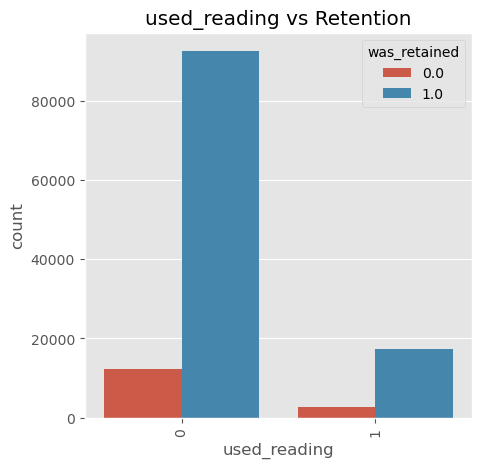

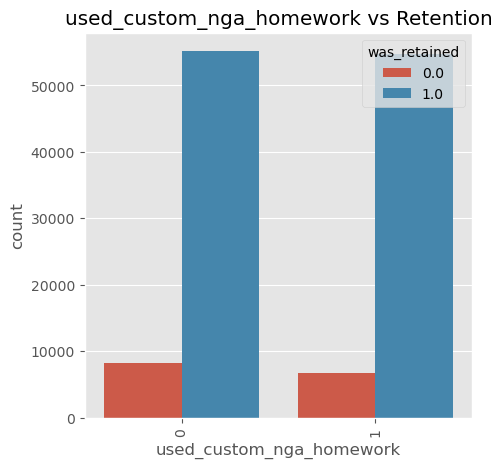

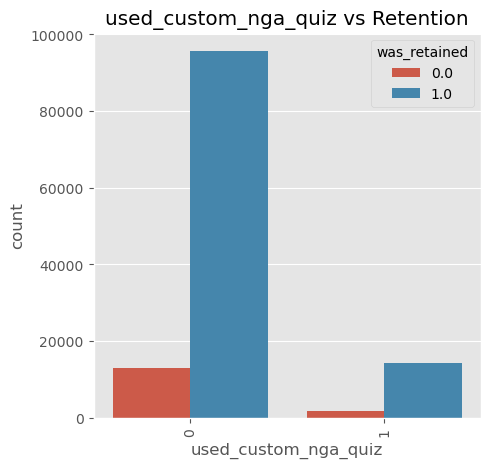

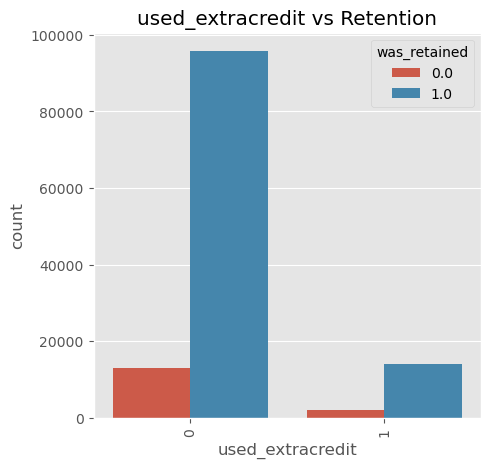

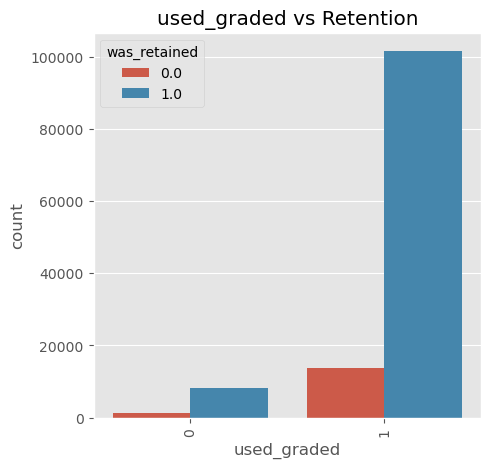

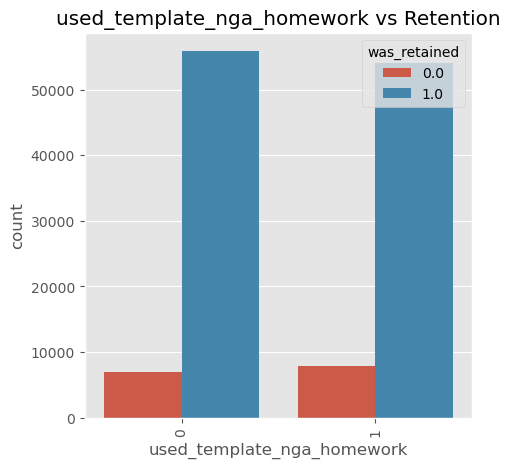

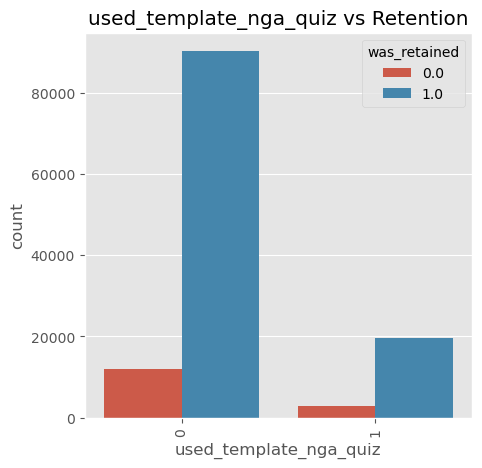

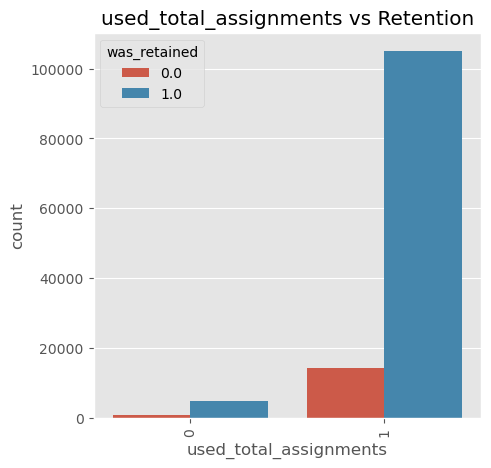

In [137]:
for column in df_subset.iloc[:, 1:-1]:
    plt.style.use("ggplot")

    plt.figure(figsize=(5, 5))
    #plt.subplot(121)
    sns.countplot(x=df_subset[column], hue=df_subset["was_retained"])
    plt.xticks(rotation=90)
    plt.title(f'{column} vs Retention')

    plt.show()

In [138]:
level2_chem = chemistry_df[(chemistry_df['used_learing_curve'] == 1) &  (chemistry_df['used_goal_and_reflection_survey'] != 0) & 
                 (chemistry_df['used_mapi'] == 1) & (df['used_diagnostics'] != 0) & (chemistry_df['used_reading'] == 1) &
                 (chemistry_df['used_custom_nga_homework'] == 1) & (chemistry_df['used_custom_nga_quiz'] == 1) &
                 (chemistry_df['used_graded'] == 1) & (chemistry_df['used_template_nga_homework'] == 1) & 
                 (chemistry_df['used_template_nga_homework'] == 1)]
# Display the subset DataFrame
level2_chem.head()

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2566/3668797991.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  level2_chem = chemistry_df[(chemistry_df['used_learing_curve'] == 1) &  (chemistry_df['used_goal_and_reflection_survey'] != 0) &


,course_id,institution_id,was_retained,week_end,week_start,subject_group_constant,course_term_constant,course_year_constant,inclusive_access__c_constant,twoyearorfouryear__c_constant,...,weeks_into_course,writing_sum_normalized,writing_tools_multi_draft_assignment_assigned_sum_cum,writing_tools_provide_feedback__draft_goal_comment_sum_cum,writing_tools_provide_feedback__editing_mark_comment_sum_cum,writing_tools_review_reports_within_writing_sum_cum,writing_tools_single_draft_assignment_assigned_sum_cum,writing_tools_use_draft_comparison_tool_sum_cum,writing_tools_use_peer_review_draft_sum_cum,foundry_extract_ts


In [139]:
chemistry_df = chemistry_df.assign(created_new_questions=chemistry_df['nga_assignment_use_private_question_sum_cum'] + 
                                   chemistry_df['nga_create_edit_a_question_sum_cum'] +
                                  chemistry_df['nga_edit_an_assessment_add_remove_questions_sum_cum'])

In [140]:
chemistry_df.head()

,course_id,institution_id,was_retained,week_end,week_start,subject_group_constant,course_term_constant,course_year_constant,inclusive_access__c_constant,twoyearorfouryear__c_constant,...,writing_sum_normalized,writing_tools_multi_draft_assignment_assigned_sum_cum,writing_tools_provide_feedback__draft_goal_comment_sum_cum,writing_tools_provide_feedback__editing_mark_comment_sum_cum,writing_tools_review_reports_within_writing_sum_cum,writing_tools_single_draft_assignment_assigned_sum_cum,writing_tools_use_draft_comparison_tool_sum_cum,writing_tools_use_peer_review_draft_sum_cum,foundry_extract_ts,created_new_questions
6,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,10/9/22,10/3/22,General Chemistry,fall,2022,False,4 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,1
11,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/14/21,11/8/21,Intro Chemistry,fall,2021,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,1
12,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/28/21,11/22/21,Intro Chemistry,fall,2021,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,1
20,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/11/22,12/5/22,General Chemistry,fall,2022,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,0
21,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/18/22,12/12/22,General Chemistry,fall,2022,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,0


In [141]:
chemistry_df['created_new_questions'] = chemistry_df['created_new_questions'].apply(lambda x: 1 if x > 1 else x)

In [142]:
chemistry_df.head()

,course_id,institution_id,was_retained,week_end,week_start,subject_group_constant,course_term_constant,course_year_constant,inclusive_access__c_constant,twoyearorfouryear__c_constant,...,writing_sum_normalized,writing_tools_multi_draft_assignment_assigned_sum_cum,writing_tools_provide_feedback__draft_goal_comment_sum_cum,writing_tools_provide_feedback__editing_mark_comment_sum_cum,writing_tools_review_reports_within_writing_sum_cum,writing_tools_single_draft_assignment_assigned_sum_cum,writing_tools_use_draft_comparison_tool_sum_cum,writing_tools_use_peer_review_draft_sum_cum,foundry_extract_ts,created_new_questions
6,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,10/9/22,10/3/22,General Chemistry,fall,2022,False,4 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,1
11,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/14/21,11/8/21,Intro Chemistry,fall,2021,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,1
12,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/28/21,11/22/21,Intro Chemistry,fall,2021,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,1
20,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/11/22,12/5/22,General Chemistry,fall,2022,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,0
21,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/18/22,12/12/22,General Chemistry,fall,2022,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,0


In [143]:
chemistry_df['created_new_questions'].value_counts()

created_new_questions
1    50202
0    30815
Name: count, dtype: int64

In [144]:
columns_of_interest = [
    'used_reading',
    'used_custom_nga_homework',
    'used_custom_nga_quiz',
    'used_extracredit',
    'used_graded',
    'used_template_nga_homework',
    'used_template_nga_quiz',
    'created_new_questions'
]

df1 = chemistry_df[columns_of_interest]
row_sums = df1.sum(axis=1)
threshold = 0.6 * df1.shape[1]
common_cond_df = chemistry_df[row_sums >= threshold]


In [145]:
level1_chemistry = common_cond_df[(common_cond_df['used_learing_curve'] == 0) & 
                                    (common_cond_df['used_diagnostics'] == 0) & 
                                    (common_cond_df['used_mapi'] == 0) & 
                                    (common_cond_df['used_goal_and_reflection_survey'] == 0)]


In [146]:
level1_chemistry.shape

(6715, 100)

In [147]:
columns_for_condition = ['used_learing_curve','used_mapi']
df3 = common_cond_df[columns_for_condition]
row_sums = df3.sum(axis=1)
threshold = 1

level22_chemistry = common_cond_df[row_sums >= threshold]

In [148]:
level2_chemistry = level22_chemistry[(level22_chemistry['used_diagnostics'] == 0) & 
                                (level22_chemistry['used_goal_and_reflection_survey'] == 0)]

In [149]:
level2_chemistry.shape

(2850, 100)

In [150]:
columns_for_condition = ['used_diagnostics', 'used_goal_and_reflection_survey']
df2 = level22_chemistry[columns_for_condition]

row_sums = df2.sum(axis=1)

threshold = 1

level3_chemistry = level22_chemistry[row_sums >= threshold]


In [151]:
level3_chemistry.shape

(804, 100)

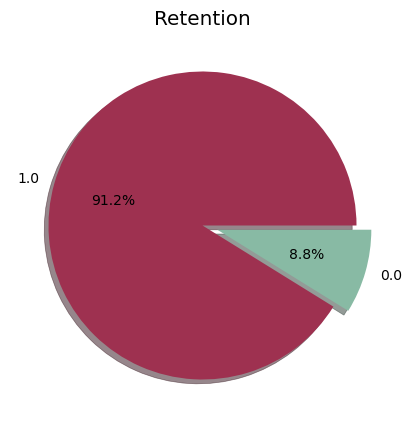

In [152]:
plt.figure(figsize=(5, 5))
ax = level1_chemistry['was_retained'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors = ['#9e3150', '#88baa4'])
ax.set_title('Retention')
plt.ylabel('')
plt.show()

In [153]:
value_counts = level1_chemistry['was_retained'].value_counts(dropna=False)
print(value_counts)

was_retained
NaN    4043
1.0    2436
0.0     236
Name: count, dtype: int64


In [154]:
value_counts = level2_chemistry['was_retained'].value_counts(dropna=False)
print(value_counts)

was_retained
NaN    1337
1.0    1314
0.0     199
Name: count, dtype: int64


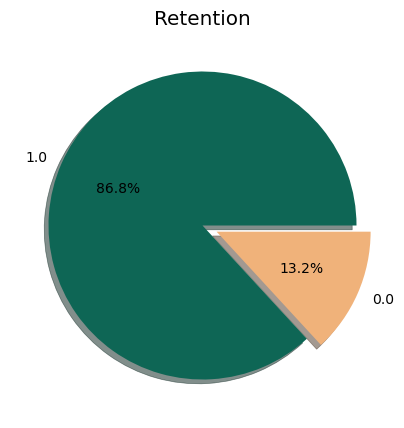

In [155]:
plt.figure(figsize=(5, 5))
ax = level2_chemistry['was_retained'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#0E6655', '#F0B27A'])
ax.set_title('Retention')
plt.ylabel('')

plt.show()

In [156]:
value_counts = level3_chemistry['was_retained'].value_counts(dropna=False)
print(value_counts)

was_retained
NaN    484
1.0    320
Name: count, dtype: int64


In [157]:
level3_chemistry['was_retained'].value_counts()

was_retained
1.0    320
Name: count, dtype: int64

### Level 0

In [158]:
columns_of_interest = [
    'used_reading',
    'used_custom_nga_homework',
    'used_custom_nga_quiz',
    'used_extracredit',
    'used_graded',
    'used_template_nga_homework',
    'used_template_nga_quiz',
    'created_new_questions'
]

df1 = chemistry_df[columns_of_interest]
row_sums = df1.sum(axis=1)
threshold = 0.6 * df1.shape[1]
level0_chemistry = chemistry_df[row_sums < threshold]


In [159]:
level0_chemistry.head()

,course_id,institution_id,was_retained,week_end,week_start,subject_group_constant,course_term_constant,course_year_constant,inclusive_access__c_constant,twoyearorfouryear__c_constant,...,writing_sum_normalized,writing_tools_multi_draft_assignment_assigned_sum_cum,writing_tools_provide_feedback__draft_goal_comment_sum_cum,writing_tools_provide_feedback__editing_mark_comment_sum_cum,writing_tools_review_reports_within_writing_sum_cum,writing_tools_single_draft_assignment_assigned_sum_cum,writing_tools_use_draft_comparison_tool_sum_cum,writing_tools_use_peer_review_draft_sum_cum,foundry_extract_ts,created_new_questions
6,26601b3f-6ef8-4e93-be5b-7a9e7752f2da,001i000000iQvONAA0,NaN,10/9/22,10/3/22,General Chemistry,fall,2022,False,4 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,1
11,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/14/21,11/8/21,Intro Chemistry,fall,2021,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,1
12,242b4296-9a20-4d7d-b632-7fc8df1e158c,001i000000iQ0JtAAK,1.0,11/28/21,11/22/21,Intro Chemistry,fall,2021,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,1
20,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/11/22,12/5/22,General Chemistry,fall,2022,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,0
21,255aa6e8-5052-4103-9a99-a93a50637ef4,001i000000iQu5PAAS,NaN,12/18/22,12/12/22,General Chemistry,fall,2022,True,2 Year,...,NaN,0,0,0,0,0,0,0,7/3/23 18:37,0


In [160]:
level0_chemistry.to_csv("level0.csv")

Should we keep 1 values of learning curve, mapi, diagnostics, grs in level0 or filter column with entires having 0

In [161]:
level0_chemistry.shape

(70363, 100)

In [162]:
level0_chemistry['used_learing_curve'].value_counts()

used_learing_curve
0    59935
1    10428
Name: count, dtype: int64

In [163]:
level0_chemistry['used_mapi'].value_counts()

used_mapi
0    69460
1      903
Name: count, dtype: int64

In [164]:
level0_chemistry['used_diagnostics'].value_counts()

used_diagnostics
0    69984
1      379
Name: count, dtype: int64

In [165]:
level0_chemistry['used_goal_and_reflection_survey'].value_counts()

used_goal_and_reflection_survey
0    68673
1     1690
Name: count, dtype: int64

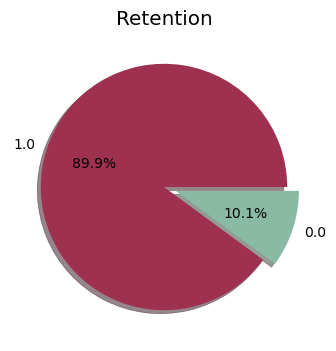

In [166]:
plt.figure(figsize=(4, 4))
ax = level0_chemistry['was_retained'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors = ['#9e3150', '#88baa4'])
ax.set_title('Retention')
plt.ylabel('')

plt.show()

In [167]:
X_columns = ['used_reading',
    'used_custom_nga_homework',
    'used_custom_nga_quiz',
    'used_extracredit',
    'used_graded',
    'used_template_nga_homework',
    'used_template_nga_quiz',
    'created_new_questions',
    'used_goal_and_reflection_survey',
    'used_learing_curve',
    'used_mapi',
    'used_diagnostics']

Y_column = 'was_retained'


spearman_corr_matrix = level0_chemistry[X_columns + [Y_column]].corr(method='spearman')

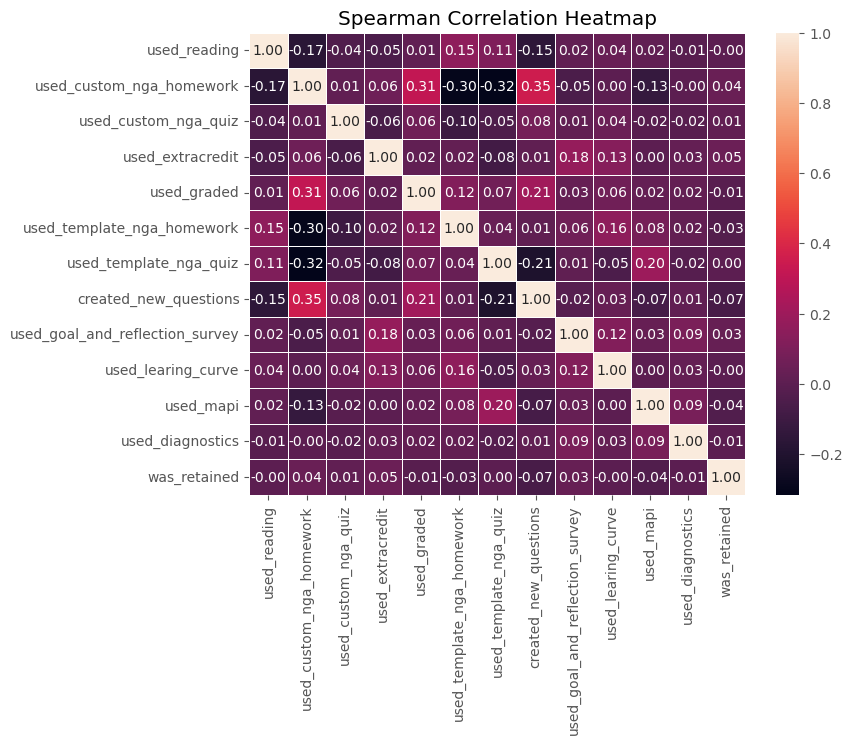

In [168]:
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Spearman Correlation Heatmap')
plt.show()

In summary, the Spearman correlation coefficients suggest weak to negligible linear relationships between the listed features and the was_retained column. 

In [169]:
threshold = 0.4

# Identify columns with more than 50% values being 1
columns_with_more_than_50_percent_1 = level0_chemistry.columns[(level0_chemistry == 1).mean() > threshold]

# Print the columns
print("Columns with more than 50% values being 1:")
print(columns_with_more_than_50_percent_1)

Columns with more than 50% values being 1:
Index(['was_retained', 'inclusive_access__c_constant', 'activity_types_used',
       'instructor_launched_in_last_week', 'used_custom_nga_homework',
       'used_graded', 'used_total_assignments', 'created_new_questions'],
      dtype='object')


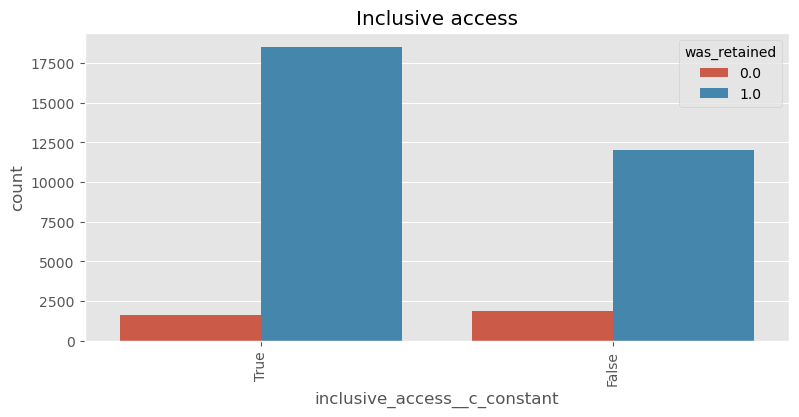

In [170]:
import seaborn as sns

plt.style.use("ggplot")

plt.figure(figsize=(20, 4))
plt.subplot(121)
order = level0_chemistry['inclusive_access__c_constant'].value_counts().index

sns.countplot(data=level0_chemistry, x='inclusive_access__c_constant', hue='was_retained', order=order)
plt.xticks(rotation=90)
plt.title('Inclusive access')

# Display the plot
plt.show()

In [171]:
column_mean = level0_chemistry['student_cnt_constant'].mean()

# Print the result
print(f"The mean number of students in level0 is: {column_mean}")

The mean number of students in level0 is: 60.44560351321007


In [172]:
column_mean = level1_chemistry['student_cnt_constant'].mean()

# Print the result
print(f"The mean number of students in level1 is: {column_mean}")

The mean number of students in level1 is: 54.5849590469099


In [173]:
column_mean = level2_chemistry['student_cnt_constant'].mean()

# Print the result
print(f"The mean number of students in level2 is: {column_mean}")

The mean number of students in level2 is: 50.278245614035086


In [174]:
column_mean = level3_chemistry['student_cnt_constant'].mean()

# Print the result
print(f"The mean number of students in level3 is: {column_mean}")

The mean number of students in level3 is: 105.16666666666667


In [175]:
result = chemistry_df[chemistry_df['student_cnt_constant'] > 1000]

# Display the rows with student count more than 1000
print(result.shape[0])

132


In [176]:
temp_df = chemistry_df[chemistry_df['student_cnt_constant'] <= 1000]

In [177]:
temp_df.shape

(80885, 100)

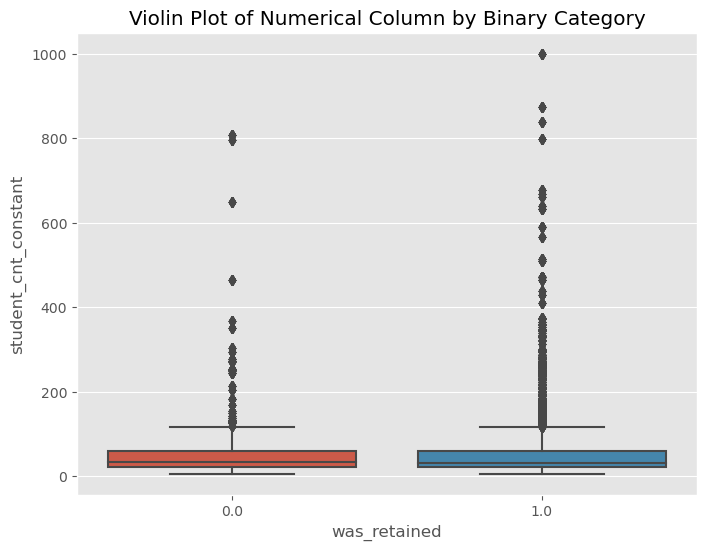

In [178]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='was_retained', y='student_cnt_constant', data=temp_df)
plt.title('Violin Plot of Numerical Column by Binary Category')
plt.show()

/Users/shambhavi.kulkarni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


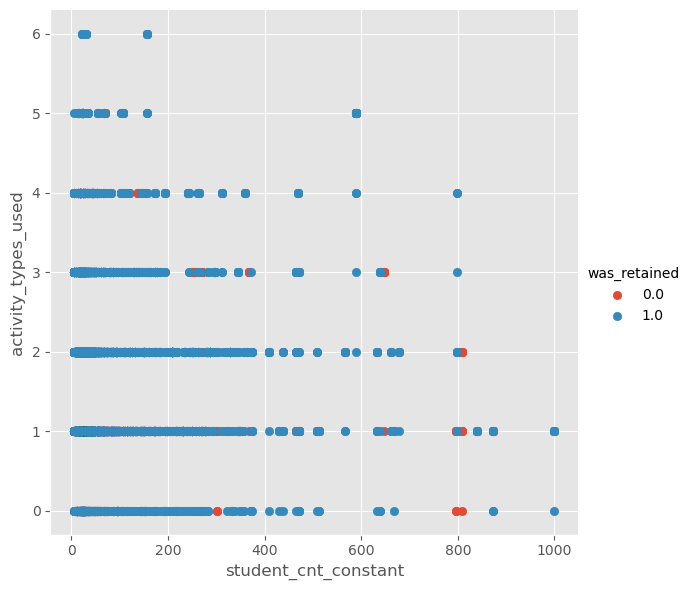

In [179]:
def pairplot_data_grid(data, feature1, feature2, target):

    sns.FacetGrid(data, hue=target, height=6).map(plt.scatter, feature1, feature2).add_legend()
    plt.show()
    
pairplot_data_grid(temp_df, "student_cnt_constant", "activity_types_used", "was_retained")


In [180]:
bins = list(range(0, 1100, 100))
temp_df['student_count_bins'] = pd.cut(temp_df['student_cnt_constant'], bins=bins, labels=[f"{i}-{i+99}" for i in range(0, 1000, 100)], include_lowest=True)

/var/folders/bg/92qc2wfn1wd57tm7ktlqdbqw0000gq/T/ipykernel_2566/2962204965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['student_count_bins'] = pd.cut(temp_df['student_cnt_constant'], bins=bins, labels=[f"{i}-{i+99}" for i in range(0, 1000, 100)], include_lowest=True)


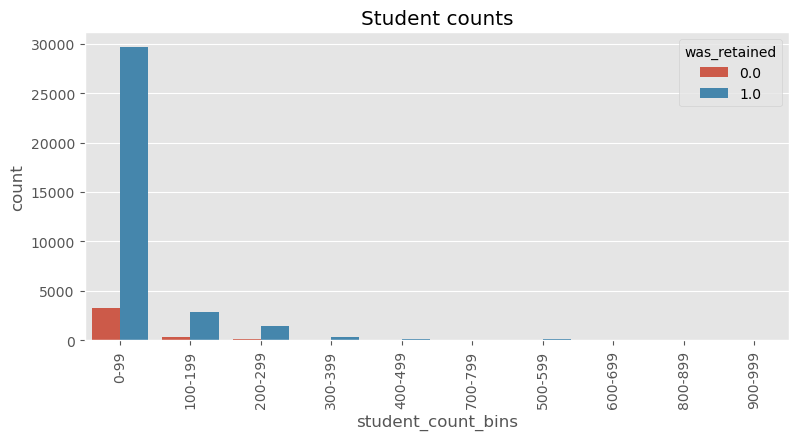

In [181]:
plt.style.use("ggplot")

plt.figure(figsize=(20, 4))
plt.subplot(121)
order = temp_df['student_count_bins'].value_counts().index

sns.countplot(data=temp_df, x='student_count_bins', hue='was_retained', order=order)
plt.xticks(rotation=90)
plt.title('Student counts')

# Display the plot
plt.show()

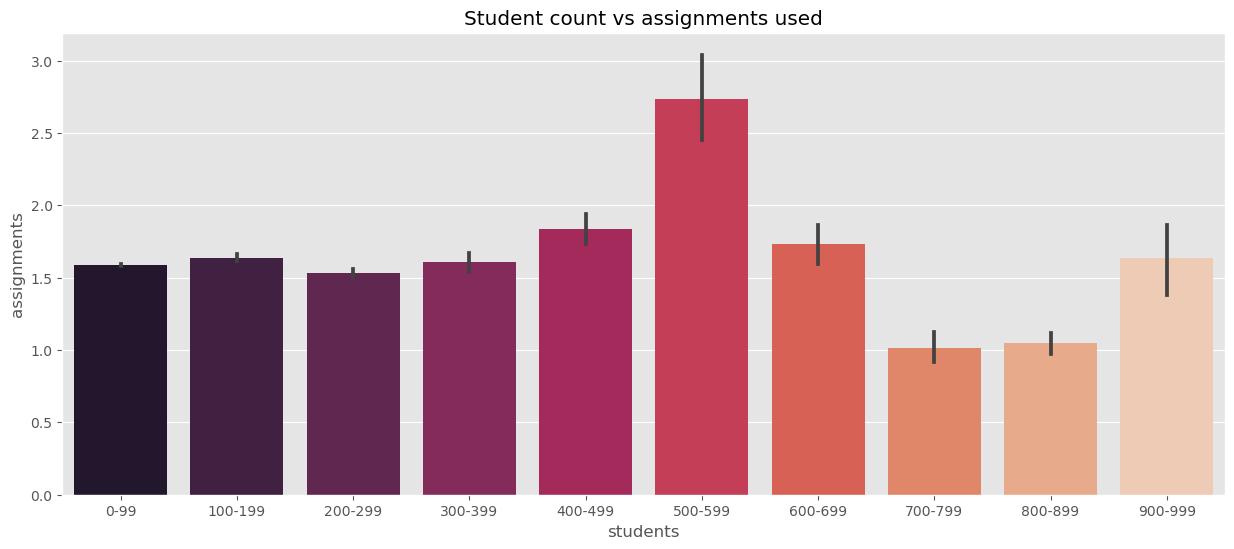

In [182]:
plt.figure(figsize=(15,6))
sns.barplot(data = temp_df, x='student_count_bins', y = 'activity_types_used', palette = "rocket")
plt.title('Student count vs assignments types used')
plt.xlabel("students")
plt.ylabel("assignments")

# Display the plot
plt.show()

In [183]:
columns_to_drop = ['custom_nga_homework_sum_normalized', 
                   'custom_nga_quiz_sum_normalized', 'diagnostics_sum_normalized', 'extracredit_sum_normalized', 
                   'goal_and_reflection_survey_sum_normalized', 'graded_sum_normalized', 
                   'in_class_activity_guide_sum_normalized', 'learing_curve_sum_normalized', 
                   'mapi_sum_normalized', 'reading_sum_normalized', 'staticfile_sum_normalized', 
                   'template_nga_homework_sum_normalized', 'template_nga_quiz_sum_normalized', 
                   'total_assignments_sum_normalized', 'ungraded_sum_normalized', 'writing_sum_normalized']

chemistry_df = chemistry_df.drop(columns=columns_to_drop)

In [184]:
columns_with_missing_values = chemistry_df.columns[chemistry_df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: ['was_retained', 'inclusive_access__c_constant', 'twoyearorfouryear__c_constant', 'integration_platform__c_constant']


In [185]:
chemistry_df['inclusive_access__c_constant'].fillna(chemistry_df['inclusive_access__c_constant'].mode()[0], inplace=True)
chemistry_df['twoyearorfouryear__c_constant'].fillna(chemistry_df['twoyearorfouryear__c_constant'].mode()[0], inplace=True)
chemistry_df['integration_platform__c_constant'].fillna(chemistry_df['integration_platform__c_constant'].mode()[0], inplace=True)

In [186]:
normalized_columns = chemistry_df.filter(like='normalized', axis=1).columns.tolist()
print("Columns with 'normalized' in their names:", normalized_columns)

Columns with 'normalized' in their names: []


In [187]:
chemistry_df.columns

Index(['course_id', 'institution_id', 'was_retained', 'week_end', 'week_start',
       'subject_group_constant', 'course_term_constant',
       'course_year_constant', 'inclusive_access__c_constant',
       'twoyearorfouryear__c_constant', 'integration_platform__c_constant',
       'student_cnt_constant', 'days_into_week_couse_start_constant',
       'activity_types_used', 'avg_days_launched', 'avg_days_launched_cum_avg',
       'avg_student_launch_cnt', 'avg_student_launch_cnt_cum_avg',
       'change_from_avg_student_launch_this_week', 'chapters_used_cnt',
       'enrollment_cs',
       'foundational_experience_completing_batch_assign_actions_sum_cum',
       'foundational_experience_custom_activity_created__assessment_sum_cum',
       'foundational_experience_custom_activity_created__instructorfile_sum_cum',
       'foundational_experience_custom_activity_created__url_sum_cum',
       'foundational_experience_custom_activity_created__writing_sum_cum',
       'foundational_experience

Reletive Plot Of Some Selected Features: A Data Subset


/Users/shambhavi.kulkarni/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

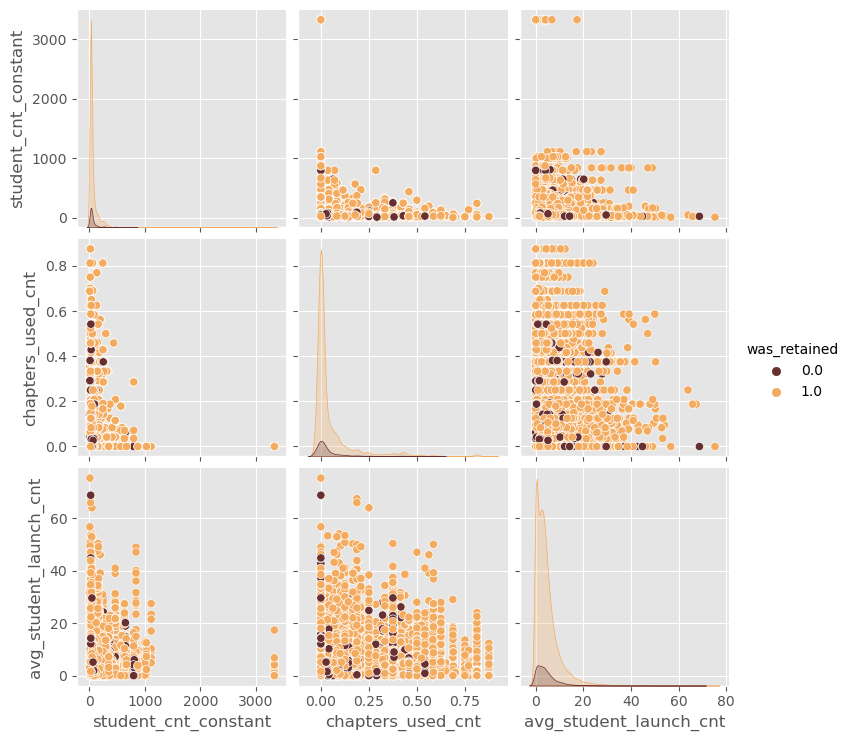

In [188]:
To_Plot = ['student_cnt_constant','chapters_used_cnt', 'avg_student_launch_cnt', 'was_retained']
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(chemistry_df[To_Plot], hue= 'was_retained',palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()


In [189]:
columns_to_drop = ['course_id','institution_id']

chemistry_df = chemistry_df.drop(columns=columns_to_drop)

In [190]:
chemistry_df = chemistry_df[(chemistry_df["student_cnt_constant"]<2000)]
chemistry_df = chemistry_df[(chemistry_df["avg_student_launch_cnt"]<60)]

In [191]:
chemistry_df["course_year_constant"].value_counts()

course_year_constant
2022    45333
2021    35381
2023      231
Name: count, dtype: int64

In [192]:
chemistry_df["course_term_constant"].value_counts()

course_term_constant
fall      76958
spring     3592
winter      223
summer      172
Name: count, dtype: int64

In [193]:
categorical_columns = chemistry_df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_columns)

Categorical columns: ['week_end', 'week_start', 'subject_group_constant', 'course_term_constant', 'twoyearorfouryear__c_constant', 'integration_platform__c_constant', 'foundry_extract_ts']


In [194]:
columns_to_drop = ['foundry_extract_ts','week_end', 'week_start']

chemistry_df = chemistry_df.drop(columns=columns_to_drop)

In [195]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['subject_group_constant', 'course_term_constant', 'integration_platform__c_constant']

chemistry_df_encoded = pd.get_dummies(chemistry_df, columns=categorical_columns)

column_to_encode = ['twoyearorfouryear__c_constant']

label_encoder = LabelEncoder()

for column in column_to_encode:
    chemistry_df_encoded[column] = label_encoder.fit_transform(chemistry_df_encoded[column])

In [196]:
correlation_matrix = chemistry_df_encoded.corr()

# Select columns with correlation close to zero with 'was_retained'
zero_correlation_columns = correlation_matrix.loc['was_retained', (correlation_matrix['was_retained'] < 0.01) & (correlation_matrix['was_retained'] > -0.01)].index.tolist()

print("Columns with zero correlation with 'was_retained':", zero_correlation_columns)

Columns with zero correlation with 'was_retained': ['days_into_week_couse_start_constant', 'activity_types_used', 'avg_days_launched_cum_avg', 'avg_student_launch_cnt', 'foundational_experience_custom_activity_created__instructorfile_sum_cum', 'foundational_experience_custom_activity_created__url_sum_cum', 'foundational_experience_push_content_updates_to_restricted_sections_sum_cum', 'gradebook_gradebook_last_30_days_filter_applied_sum_cum', 'learningcurve_learningcurve_activity_assigned_sum_cum', 'percent_of_students_who_launched', 'percent_of_students_who_launched_cum_avg', 'reading_reading_snippet_assigned_sum_cum', 'used_custom_nga_quiz', 'used_diagnostics', 'used_learing_curve', 'used_reading', 'used_total_assignments', 'used_ungraded', 'writing_tools_review_reports_within_writing_sum_cum', 'subject_group_constant_General Chemistry', 'integration_platform__c_constant_Blackboard', 'integration_platform__c_constant_Moodle']


In [197]:
columns_to_drop = ['days_into_week_couse_start_constant', 'avg_days_launched_cum_avg', 
                   'avg_student_launch_cnt', 'foundational_experience_custom_activity_created__instructorfile_sum_cum',
                   'foundational_experience_custom_activity_created__url_sum_cum', 
                   'foundational_experience_push_content_updates_to_restricted_sections_sum_cum', 
                   'gradebook_gradebook_last_30_days_filter_applied_sum_cum', 'learningcurve_learningcurve_activity_assigned_sum_cum', 
                   'percent_of_students_who_launched', 'percent_of_students_who_launched_cum_avg', 
                   'reading_reading_snippet_assigned_sum_cum','writing_tools_review_reports_within_writing_sum_cum']

chemistry_df_encoded = chemistry_df_encoded.drop(columns=columns_to_drop)

Dropping columns based on domain knowledge to reduce variables

In [198]:
chemistry_df_encoded.shape

(80945, 80)

In [199]:
columns_to_drop = ['gradebook_add_gradebook_note_for_student_sum_cum',
       'gradebook_edit_grade_details_sum_cum',
       'gradebook_gradebook_last_7_days_filter_applied_sum_cum',
       'instructor_launch_once_in_last_week_avg',
       'instructor_launched_in_last_week', 'instructors_assignment_launch_sum',
        'nga_assignment_use_private_question_sum_cum',
       'nga_create_edit_a_question_sum_cum',
       'nga_edit_an_assessment_add_remove_questions_sum_cum',
       'nga_review_student_work_in_iac_sum_cum', 'writing_tools_multi_draft_assignment_assigned_sum_cum',
       'writing_tools_provide_feedback__draft_goal_comment_sum_cum',
       'writing_tools_provide_feedback__editing_mark_comment_sum_cum',
       'writing_tools_single_draft_assignment_assigned_sum_cum']

chemistry_df_encoded = chemistry_df_encoded.drop(columns = columns_to_drop)

In [200]:
df_corr = chemistry_df_encoded.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

In [201]:
column_names = df_corr.columns
pairs = []

for i in range(len(column_names)):
    for j in range(i + 1, len(column_names)):
        if labels[i, j] == "S":
            pairs.append((column_names[i], column_names[j]))

print(pairs)

[('student_cnt_constant', 'enrollment_cs'), ('avg_student_launch_cnt_cum_avg', 'student_assignment_launch_avg_cum_avg'), ('pathfinder_instructor_assigns_a_final_test_sum_cum', 'pathfinder_instructor_assigns_a_practice_test_sum_cum'), ('pathfinder_instructor_assigns_a_final_test_sum_cum', 'pathfinder_instructor_assigns_a_study_plan_sum_cum'), ('pathfinder_instructor_assigns_a_final_test_sum_cum', 'used_diagnostics'), ('pathfinder_instructor_assigns_a_practice_test_sum_cum', 'pathfinder_instructor_assigns_a_study_plan_sum_cum'), ('pathfinder_instructor_assigns_a_practice_test_sum_cum', 'used_diagnostics'), ('pathfinder_instructor_assigns_a_study_plan_sum_cum', 'used_diagnostics'), ('used_graded', 'used_total_assignments'), ('course_term_constant_fall', 'course_term_constant_spring')]


In [202]:
columns_to_drop = [ 'enrollment_cs', 'student_assignment_launch_avg_cum_avg', 
                   'pathfinder_instructor_assigns_a_final_test_sum_cum',
                    'pathfinder_instructor_assigns_a_study_plan_sum_cum', 
                   'pathfinder_instructor_assigns_a_practice_test_sum_cum']

chemistry_df_encoded = chemistry_df_encoded.drop(columns = columns_to_drop)

In [203]:
chemistry_df_encoded.shape

(80945, 61)

In [204]:
chemistry_df_encoded.columns

Index(['was_retained', 'course_year_constant', 'inclusive_access__c_constant',
       'twoyearorfouryear__c_constant', 'student_cnt_constant',
       'activity_types_used', 'avg_days_launched',
       'avg_student_launch_cnt_cum_avg',
       'change_from_avg_student_launch_this_week', 'chapters_used_cnt',
       'foundational_experience_completing_batch_assign_actions_sum_cum',
       'foundational_experience_custom_activity_created__assessment_sum_cum',
       'foundational_experience_custom_activity_created__writing_sum_cum',
       'foundational_experience_launched_in_class_activity_guide_icag_sum_cum',
       'foundational_experience_using_the_prebuilt_course_sum_cum',
       'instructors_assignment_launch_sum_cum_avg',
       'instructors_days_launch_sum', 'instructors_days_launch_sum_cum_avg',
       'nga_assign_an_assessment_in_quiz_mode_sum_cum',
       'rni_grs_assignment_assigned_sum_cum',
       'rni_insights_report_view_sum_cum', 'rni_qq_report_view_sum_cum',
       'rni_sk

In [211]:
value_counts = chemistry_df_encoded['was_retained'].value_counts(dropna=False)
print(value_counts)

was_retained
NaN    42232
1.0    34836
0.0     3877
Name: count, dtype: int64


In [ ]:
new_df = 

In [ ]:
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)

## Economics

In [ ]:
economics_df = df[df['subject_group_constant'].str.contains('Economics')]

In [ ]:
economics_df.head()

In [ ]:
economics_df['subject_group_constant'].value_counts()

In [ ]:
economics_df.shape

In [ ]:
economics_df['was_retained'].value_counts()

In [ ]:
#Visualizing value counts split
plt.figure(figsize=(5, 5))
ax = economics_df['was_retained'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors = ['#9e3150', '#88baa4'])
ax.set_title('Retention')
plt.ylabel('')

# Show the plot
plt.show()